In [3]:
import pandas as pd 
feature_map = pd.read_csv("traj_feature.csv")

In [13]:
res_df = feature_map[['dis1_res', 'dis2_res']]
points = res_df.values

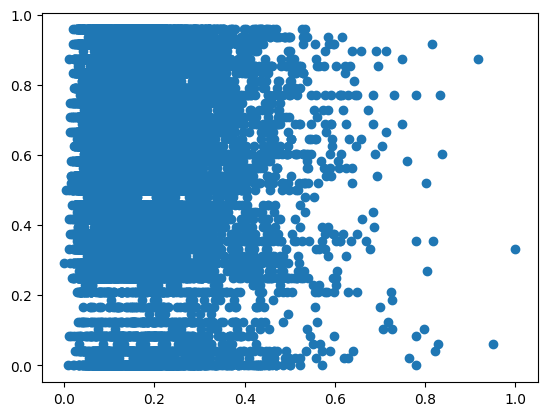

In [14]:
import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1])

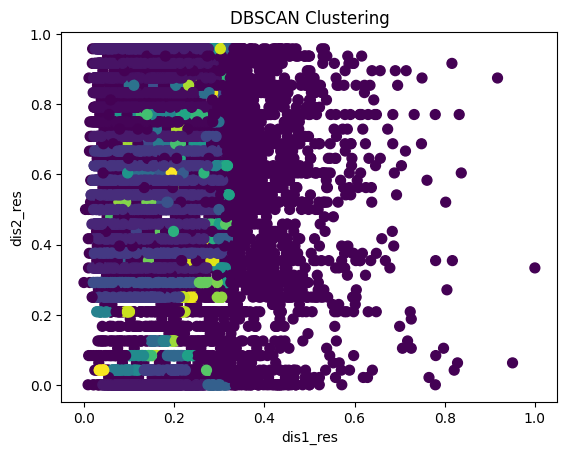

17600


In [56]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.006, min_samples=10)
clusters = dbscan.fit_predict(points)
plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.xlabel("dis1_res")
plt.ylabel("dis2_res")
plt.title("DBSCAN Clustering")
plt.show()

[0 0]


Text(0.5, 1.0, 'DBSCAN Clustering')

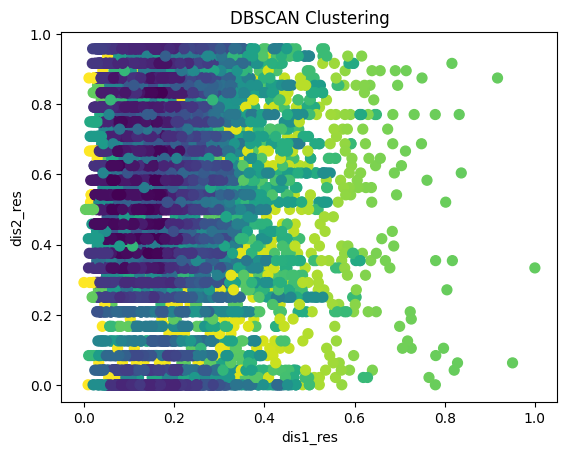

In [71]:
import numpy as np
classified_points = points[clusters!=-1]
clusters = clusters[clusters != -1]
plt.scatter(classified_points[:, 0], classified_points[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.xlabel("dis1_res")
plt.ylabel("dis2_res")
plt.title("DBSCAN Clustering")


In [74]:
columns = ['dis1_res', 'dis2_res']
points_df = pd.DataFrame(classified_points, columns=columns)
columns = ['categories']
categories_df = pd.DataFrame(clusters, columns=columns)
points_df = pd.concat([points_df, categories_df],axis=1)

这里选定三个区间（分别对应凌晨3点，早晨10点以及傍晚18点）：
[0.125-0.005, 0.125+0.005],[0.417-0.005, 0.417-0.025],[0.417-0.025, 0.417-0.025],[0.75-0.025, 0.75-0.025]

In [84]:
# 3:00
time_field1 = points_df[(points_df['dis2_res'] >= 0.125-0.005) & (points_df['dis2_res'] <= 0.125+0.005)]

# 10:00
time_field2 = points_df[(points_df['dis2_res'] >= 0.417-0.005) & (points_df['dis2_res'] <= 0.417+0.005)]

# 18:00
time_field3 = points_df[(points_df['dis2_res'] >= 0.75-0.005) & (points_df['dis2_res'] <= 0.75+0.005)]

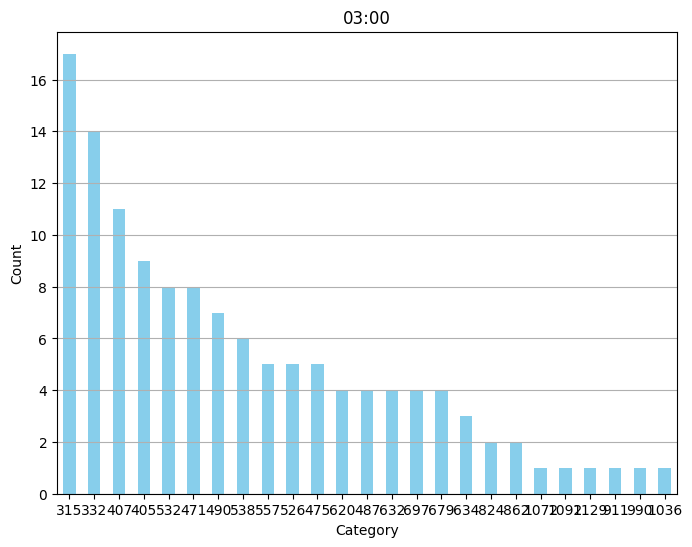

In [87]:
# 计算 'categories' 列中各个类别的数目
counts = time_field1['categories'].value_counts()

# 绘制条形图或直方图
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('03:00')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # 使 x 轴标签水平显示
plt.grid(axis='y')  # 添加 y 轴网格线
plt.show()

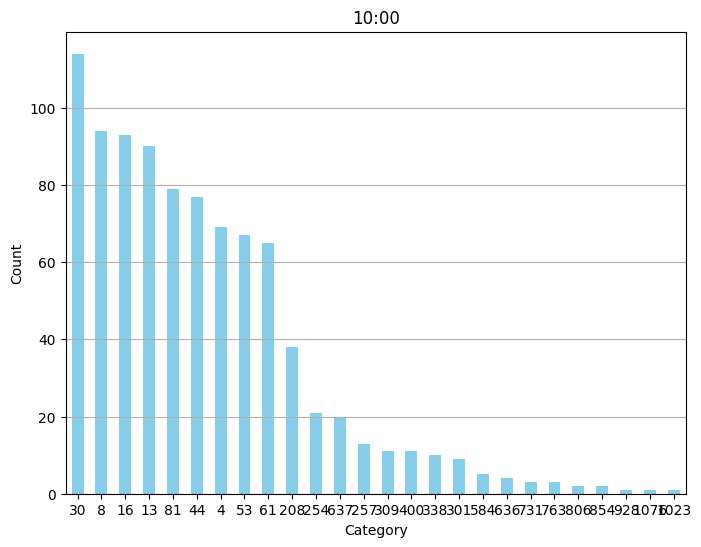

In [88]:
# 计算 'categories' 列中各个类别的数目
counts = time_field2['categories'].value_counts()

# 绘制条形图或直方图
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('10:00')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # 使 x 轴标签水平显示
plt.grid(axis='y')  # 添加 y 轴网格线
plt.show()

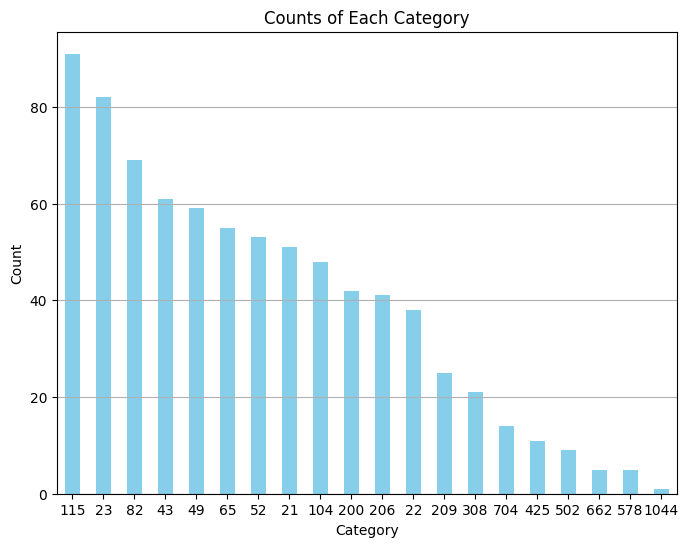

In [85]:
# 计算 'categories' 列中各个类别的数目
counts = time_field3['categories'].value_counts()

# 绘制条形图或直方图
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('18:00')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # 使 x 轴标签水平显示
plt.grid(axis='y')  # 添加 y 轴网格线
plt.show()

In [86]:
# from sklearn.cluster import MeanShift
# meanshift = MeanShift(bandwidth=0.01)
# clusters = meanshift.fit_predict(points)

# cluster_centers = meanshift.cluster_centers_

# # 将聚类结果可视化
# plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
# #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("Mean Shift Clustering")
# plt.legend()
# plt.show()